In [2]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange,tqdm
import sys
sys.path.append('/home/irit/Documents/Myeloma_Syrine/Scripts')  # Add the path to the project directory
from Scripts import xgboost_model,SVM_model,Lin_model,process_data, dim_reduction
import importlib
from sklearn.decomposition import NMF, PCA
from random import random
from sklearn.linear_model import LogisticRegression
import plotly.express as px

In [88]:
importlib.reload(xgboost_model)
importlib.reload(SVM_model)
importlib.reload(Lin_model)
importlib.reload(process_data)
importlib.reload(dim_reduction)

<module 'Scripts.dim_reduction' from '/home/irit/Documents/Myeloma_Syrine/Scripts/dim_reduction.py'>

In [3]:
#import data
X,y=process_data.main('/home/irit/Documents/Myeloma/TPM_count_mrd_response.csv',0,0,5,'Max')

### PCA

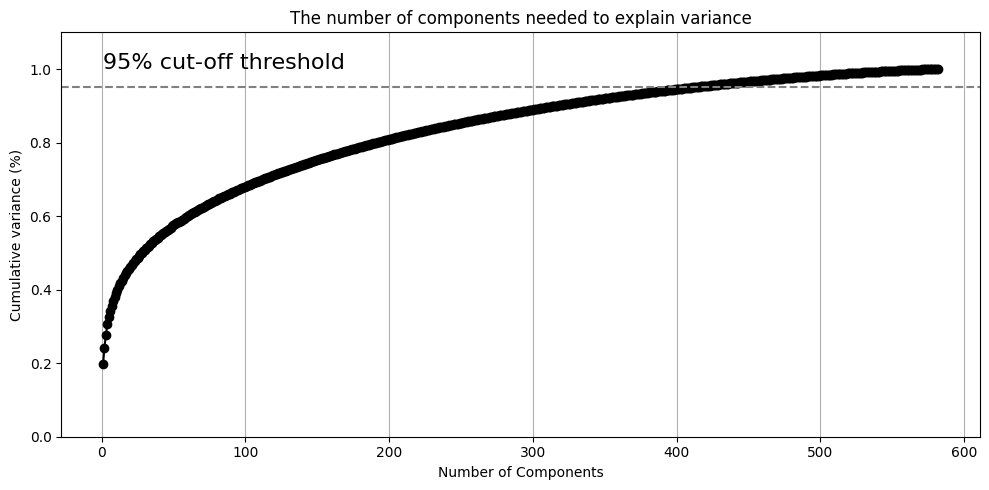

In [89]:
nb_components=dim_reduction.get_nb_components(X,0.95)
W_pca,pca=dim_reduction.pca_transform(X,nb_components)

In [62]:
W_pca.shape

(582, 411)

Predict with transformed matrix
Linear regression,SVM,XGBoost

In [64]:
train_results,test_results=Lin_model.linear_model(pd.DataFrame(W_pca,index=X.index),y,LogisticRegression(max_iter=int(1e6),solver='lbfgs'),10)
print('LR: résultats entaînement',train_results)
print('La moyenne est: ',test_results['Accuracy'].mean())
print('Avec un écart type de: ', test_results['Accuracy'].std())

LR: résultats entaînement {'Accuracy': array([0.96367113, 0.96558317, 0.95992366, 0.95801527, 0.95801527,
       0.95610687, 0.96183206, 0.96755725, 0.96946565, 0.96946565]), 'AUC': array([0.96367113, 0.96558317, 0.95992366, 0.95801527, 0.95801527,
       0.95610687, 0.96183206, 0.96755725, 0.96946565, 0.96946565]), 'f1 score': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}
La moyenne est:  0.5017825832846289
Avec un écart type de:  0.04512580284748763


In [ ]:
res_train,res_test=SVM_model.svm_classification(pd.DataFrame(W_pca,index=X.index),y,5)

In [66]:
print('SVM: résultats entaînement',res_train)
print('La moyenne est: ',res_test['Accuracy'].mean())
print('Avec un écart type de: ', res_test['Accuracy'].std())

SVM: résultats entaînement {'Accuracy': array([0.88387097, 0.89892473, 0.89484979, 0.89484979, 0.90128755]), 'AUC': array([0.88387097, 0.89892473, 0.89484979, 0.89484979, 0.90128755])}
La moyenne est:  0.5670055997642205
Avec un écart type de:  0.017683195793200962


In [ ]:
train_res,test_res=xgboost_model.xgb_classification(pd.DataFrame(W_pca,index=X.index),y,5)

In [68]:
print('XGB: résultats entaînement',train_res)
print('La moyenne est: ',test_res['Accuracy'].mean())
print('Avec un écart type de: ', test_res['Accuracy'].std())

XGB: résultats entaînement {'Accuracy': array([0.90752688, 0.9827957 , 0.85407725, 0.81974249, 0.89699571]), 'AUC': array([0.90752688, 0.9827957 , 0.85407725, 0.81974249, 0.89699571])}
La moyenne est:  0.5670645446507516
Avec un écart type de:  0.038859290709740486


In [73]:
pca=PCA(nb_components)


In [80]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    W_pca,
    labels=labels,
    dimensions=range(5),
    color=y,
)
fig.update_traces(diagonal_visible=False)
fig.show()

### NMF

On commence par essayer une NMF à 460 composantes (comme le nombre de composantes choisies pour la PCA)

In [41]:
model=NMF(n_components=460,init='random',max_iter=1000,random_state=1,verbose=1)

In [42]:
model.fit(X)

violation: 1.0
violation: 0.2665634464602329
violation: 0.14423809083032957
violation: 0.10064576250514871
violation: 0.08199018171738175
violation: 0.06988029591069032
violation: 0.06088214820650661
violation: 0.05384463981782536
violation: 0.04795111649259706
violation: 0.04284560956002856
violation: 0.038841317631615205
violation: 0.03589334180911159
violation: 0.03347399516070201
violation: 0.03154394552984075
violation: 0.029377453106790963
violation: 0.026946288838229093
violation: 0.02465118500184008
violation: 0.0228506007009527
violation: 0.0214166315004587
violation: 0.02017316177655588
violation: 0.01896434191262072
violation: 0.017878411081677887
violation: 0.016985868121991498
violation: 0.01618281719501582
violation: 0.015520594445964608
violation: 0.014904087734356317
violation: 0.014343793989275952
violation: 0.013780406631318534
violation: 0.013258252261962438
violation: 0.01281619620410525
violation: 0.012383029329483427
violation: 0.011949035755449647
violation: 0.01

NMF(init='random', max_iter=1000, n_components=460, random_state=1, verbose=1)

In [44]:
W = model.transform(X)
H = model.components_

violation: 1.0
violation: 0.5916420484210952
violation: 0.5076142741713563
violation: 0.4717240639395688
violation: 0.4678440456528311
violation: 0.43117407894136417
violation: 0.3512230969527809
violation: 0.2586321140274081
violation: 0.19881575862475157
violation: 0.15399037172937516
violation: 0.11538194201735358
violation: 0.08570243887157501
violation: 0.06854426627428174
violation: 0.05522097999199302
violation: 0.048065638300103054
violation: 0.04053755147129479
violation: 0.03543013207244889
violation: 0.03153447846136226
violation: 0.02759015525594703
violation: 0.02576364421762113
violation: 0.02299538383815315
violation: 0.020783755641314797
violation: 0.01848172531561675
violation: 0.015935631205468783
violation: 0.014749965110441049
violation: 0.013371947375244367
violation: 0.011819189875023884
violation: 0.010220879306483624
violation: 0.009238872578002657
violation: 0.008456633550036199
violation: 0.007515723341086521
violation: 0.007150741874724706
violation: 0.006726

In [45]:
W.shape

(582, 460)

Predict with transformed matrix

Linear regression

In [46]:
train_results,test_results=Lin_model.linear_model(pd.DataFrame(W,index=X.index),y,LogisticRegression(max_iter=int(1e6),solver='lbfgs'),10)

In [47]:
train_results

{'Accuracy': array([0.89483748, 0.89101338, 0.89312977, 0.90648855, 0.87977099,
        0.88931298, 0.89122137, 0.90267176, 0.88358779, 0.88740458]),
 'AUC': array([0.89483748, 0.89101338, 0.89312977, 0.90648855, 0.87977099,
        0.88931298, 0.89122137, 0.90267176, 0.88358779, 0.88740458]),
 'f1 score': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [11]:
np.mean(np.array([0.60430108, 0.78064516, 0.5193133 , 0.5193133 , 0.82618026]))

0.64995062

In [48]:
print('La moyenne est: ',test_results['Accuracy'].mean())
print('Avec un écart type de: ', test_results['Accuracy'].std())

La moyenne est:  0.5206896551724138
Avec un écart type de:  0.051515824696868


SVM

In [ ]:
res_train,res_test=SVM_model.svm_classification(pd.DataFrame(W,index=X.index),y,5)

In [50]:
res_train

{'Accuracy': array([0.94193548, 0.47096774, 0.94420601, 1.        , 0.95922747]),
 'AUC': array([0.94193548, 0.47096774, 0.94420601, 1.        , 0.95922747])}

In [51]:
print('La moyenne est: ',res_test['Accuracy'].mean())
print('Avec un écart type de: ', res_test['Accuracy'].std())

La moyenne est:  0.5205717653993516
Avec un écart type de:  0.0286616442273273


XGBoost

In [ ]:
res_train,res_test=xgboost_model.xgb_classification(pd.DataFrame(W,index=X.index),y,5)

In [53]:
res_train

{'Accuracy': array([0.60430108, 0.78064516, 0.5193133 , 0.5193133 , 0.82618026]),
 'AUC': array([0.60430108, 0.78064516, 0.5193133 , 0.5193133 , 0.82618026])}

In [54]:
print('La moyenne est: ',res_test['Accuracy'].mean())
print('Avec un écart type de: ', res_test['Accuracy'].std())

La moyenne est:  0.5171382257589154
Avec un écart type de:  0.014071324744842061


Réduction "brusque" : à deux dimensions -> 2 métagènes qui coderaient pour MRD+, MRD-
Interprétation : clusterise les patients selon le métagène le plus exprimé -> visualisation

In [55]:
model_2=NMF(n_components=2,init='random',max_iter=100,random_state=1,verbose=1)
model_2.fit(X.T)
W_2=model_2.transform(X.T)
H_2=model_2.components_

violation: 1.0
violation: 0.12498889486005485
violation: 0.05555976847977817
violation: 0.05487317061643114
violation: 0.06818117542028751
violation: 0.08436941491529817
violation: 0.09348196759662686
violation: 0.08927703890370114
violation: 0.0731441543304148
violation: 0.05352528397200939
violation: 0.03778144670420304
violation: 0.027017735117905534
violation: 0.020159587124120987
violation: 0.01579919634485735
violation: 0.012863129026893325
violation: 0.010837134208525459
violation: 0.009444126954012037
violation: 0.00848932870874812
violation: 0.007792940676831562
violation: 0.007273526597630624
violation: 0.006846908260476924
violation: 0.00647826844341746
violation: 0.006162115548045304
violation: 0.005879750976567613
violation: 0.005621493892331931
violation: 0.005382503531215994
violation: 0.005156367946330513
violation: 0.00494331710347422
violation: 0.0047408606303505785
violation: 0.004552631266455956
violation: 0.004373319455526618
violation: 0.0042007988842875064
violat

/home/irit/.local/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


violation: 1.0
violation: 0.2144568546729273
violation: 0.08206548548651874
violation: 0.03121522174239278
violation: 0.01191801880276471
violation: 0.0045703736229401595
violation: 0.0017556070631571002
violation: 0.0006751399875416351
violation: 0.00025971188901286537
violation: 9.991403384296561e-05
Converged at iteration 11


In [56]:
H2_reordered=np.concatenate((H_2[:,y==1],H_2[:,y==0]),axis=1)

Visualisation (https://www.pnas.org/doi/10.1073/pnas.0308531101 : explication de l'interprétation de la visualisation ici)

<Axes: >

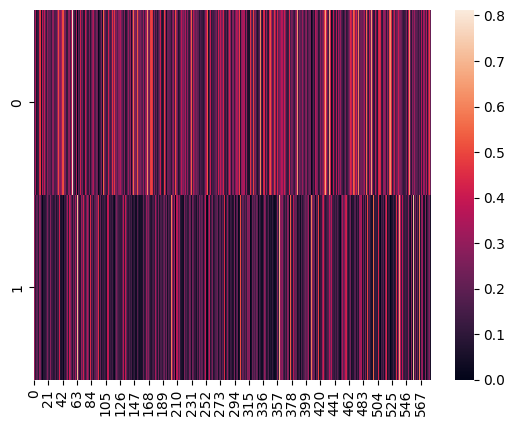

In [57]:
sns.heatmap(H2_reordered)

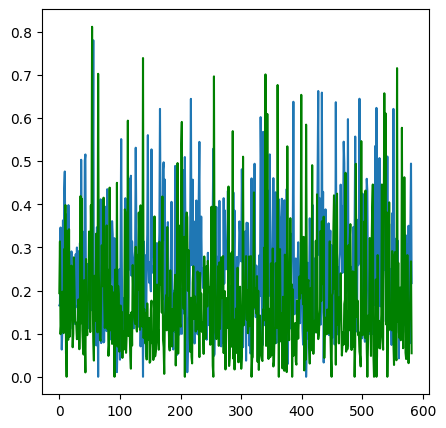

In [58]:
plt.figure(figsize=(5,5))
plt.plot(H2_reordered[0,:])
plt.plot(H2_reordered[1,:],c='g')
plt.show()

Choosing dimension with consensus clustering algorithm 